# Аналитика для геймдева:
## Анализ рекламных источников.

[Ссылка на Tableu](https://public.tableau.com/app/profile/arthur.shaymardanov/viz/Space_Brothers_Yandex_Praktikum/Dashboard1)

[Ссылка на презентацию](https://disk.yandex.ru/i/2JyNomeygWGi3g)

## Цель: Провести комплексный анализ данных пользователей для выявления влияния рекламного источника на поведение пользователей.

## Задачи: 
Проанализируйте поведения игроков в зависимости от источника перехода.

- Проведите исследовательский анализ данных;
- Проанализируйте влияние источника перехода в игру на поведение пользователя;
- Проверьте статистические гипотезы
    1. Проверить гипотезу: время завершения уровня различается в зависимости способа прохождения:
        - через реализацию проекта,
        - через победу над первым игроком.
    2. Сформулировать собственную статистическую гипотезу. Дополнить её нулевой и альтернативной гипотезами. Проверить гипотезу с помощью статистического теста.

<a name="table_of_contents"></a>
# План: 
1) [Загрузить библиотеки и базы данных.](#stage_1)

- [Посмотреть на сами данные (пропуски, дубликаты, типы данных)](#s_1)
    * [Просмотр и предработка бд ad_cost](#dt1)
    * [Просмотр и предработка бд game_actions](#dt2)
    * [Просмотр и предработка бд user_source](#dt3)

2) [Провести исследовательский анализ данных (EDA)](#stage_2)

- [Сформировать категории пользователей.](#s_2)

- [Средняя активность пользователей](#s_3)
    
- [Посмотреть на рекламные источники и количество привлеченных пользователей.](#s_4)
    
3) [Провести анализ источников и их влияния.](#stage_3)

- [Когорты и Retention Rate](#s_5)

- [CAC](#s_6)

- [Дополнительные графики по рекламным источникам](#s_9)
    
4) [Проверка гипотез.](#stage_4)

- [время завершения уровня различается в зависимости способа прохождения:через реализацию проекта / через победу над первым игроком.](#s_7)
   
- [Рекламный источник имеет влияние на выбор стратегии игрока](#s_8)

5) [Общие выводы.](#stage_5)

6) [Рекомендации.](#stage_6)

<a name="stage_1"></a>
## Шаг 1: Загрузка библиотек и баз данных:
[К оглавлению](#table_of_contents)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math
import seaborn as sns
import datetime as dt
from io import BytesIO
import requests
from bs4 import BeautifulSoup as bs
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
ad_costs = pd.read_csv('/datasets/ad_costs.csv')
game_actions = pd.read_csv('/datasets/game_actions.csv')
user_source = pd.read_csv('/datasets/user_source.csv')

<a name="s_1"></a>
## Предработка данных:
[К оглавлению](#table_of_contents)


<a name="dt1"></a>
### Просмотр и предработка бд ad_costs:
[К оглавлению](#table_of_contents)

In [3]:
ad_costs.head(10)

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


In [4]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null object
cost      28 non-null float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [5]:
#дубликаты
ad_costs.duplicated().sum()

0

In [6]:
#пропуски
ad_costs.isna().sum()

source    0
day       0
cost      0
dtype: int64

In [7]:
#преобразую столбец с днем в тип данных для даты
ad_costs['day'] = pd.to_datetime(ad_costs['day'], format='%Y-%m-%d')

In [8]:
ad_costs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null datetime64[ns]
cost      28 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


Был преобразован столбец с датой

<a name="dt2"></a>
### Просмотр и предработка бд game_actions:
[К оглавлению](#table_of_contents)

In [9]:
game_actions.head(10)

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
5,2020-05-04 00:00:36,building,assembly_shop,06c592ca-902d-42bb-bac3-75ce84cca159,NaN
6,2020-05-04 00:00:36,building,assembly_shop,4fe0f101-694b-4e31-9740-d1d87f7208ea,NaN
7,2020-05-04 00:00:38,building,assembly_shop,beb8ca15-33a9-465d-b47b-89aa96f89c9a,NaN
8,2020-05-04 00:00:44,building,assembly_shop,65a92713-5969-48b1-8945-bfefa5063887,NaN
9,2020-05-04 00:01:33,building,assembly_shop,fa352362-d258-472c-b295-2796ccc39fa3,NaN


In [10]:
game_actions.tail(10)

,event_datetime,event,building_type,user_id,project_type
135630,2020-06-04 08:29:42,project,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,satellite_orbital_assembly
135631,2020-06-04 13:26:25,building,research_center,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN
135632,2020-06-04 15:50:38,finished_stage_1,NaN,22cce310-fe10-41a2-941b-9c3d63327fea,NaN
135633,2020-06-04 17:56:14,finished_stage_1,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN
135634,2020-06-04 18:14:33,building,research_center,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN
135639,2020-06-05 12:32:49,finished_stage_1,NaN,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN


In [11]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135640 non-null object
event             135640 non-null object
building_type     127957 non-null object
user_id           135640 non-null object
project_type      1866 non-null object
dtypes: object(5)
memory usage: 5.2+ MB


In [12]:
#дубликаты
game_actions.duplicated().sum()

1

In [13]:
#пропуски
game_actions.isna().sum()

event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133774
dtype: int64

In [14]:
#преобразую столбец с датой и верменем в тип данных для даты
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'], format='%Y-%m-%dT%H:%M:%S')

In [15]:
game_actions = game_actions.drop_duplicates()
game_actions.duplicated().sum()

0

In [16]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135639 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135639 non-null datetime64[ns]
event             135639 non-null object
building_type     127956 non-null object
user_id           135639 non-null object
project_type      1866 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 6.2+ MB


In [17]:
game_actions['project_type'].value_counts()

satellite_orbital_assembly    1866
Name: project_type, dtype: int64

In [18]:
game_actions.groupby('event')['user_id'].count().reset_index().sort_values(by=['user_id'], ascending=False)

,event,user_id
0,building,127956
1,finished_stage_1,5817
2,project,1866


In [19]:
game_actions.groupby('event')['user_id'].nunique().reset_index().sort_values(by=['user_id'], ascending=False)

,event,user_id
0,building,13576
1,finished_stage_1,5817
2,project,1866


Дата сет по игровым событиям оказался самым требовательным вот что удалось узнать:
1. Был один дубликат, который я удалил.
2. Что касается столбцов с пропущенными значениями:
    * Я оставлю столбец с типом постройки - этот столбец в целом не нужен, но если вдруг будет мешать, то удалю.
    * Столбец с типом объекта поможет создать классификацию пользователей, а значит будет переработан.

<a name="dt3"></a>
### Просмотр и предработка бд user_source:
[К оглавлению](#table_of_contents)

In [20]:
user_source.head(10)

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads
5,003b80c6-4164-4157-bb2a-03d0181d39c4,yandex_direct
6,003ee7e8-6356-4286-a715-62f22a18d2a1,instagram_new_adverts
7,004074f8-251a-4776-922c-8348dca1a2f6,facebook_ads
8,00440efd-aa50-4b4b-aae8-ffcd1782729d,facebook_ads
9,00464e5e-28ed-4be6-bf44-517ef7b3937b,yandex_direct


In [21]:
user_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
user_id    13576 non-null object
source     13576 non-null object
dtypes: object(2)
memory usage: 212.2+ KB


In [22]:
#дубликаты
user_source.duplicated().sum()

0

In [23]:
#пропуски
user_source.isna().sum()

user_id    0
source     0
dtype: int64

Датасет чист

## Вывод по Шагу 1:
1. Были предработаны данные по трем базам данных.
2. В базе данных по игровым действиям на данный момент остаются без изменений два столбца с пропусками.
    - Вот что хочу сделать:
        * Создать категории пользователей те кто: побеждает врага без постройки, строители, и те кто 1 урвоень не завершили. В этом поможет столбец с типом проекта, где пропущено больше всего значений.
        * В конце должен получится новый датасет с замененым столбцом типа проекта.

<a name="stage_2"></a>
## Шаг 2. Исследовательский анализ данных
[К оглавлению](#table_of_contents)

<a name="s_2"></a>
### Формирование категорий пользователей
[К оглавлению](#table_of_contents)

In [24]:
#Посмотрю сколько всего построено орбитальных станций
game_actions['project_type'].value_counts()

satellite_orbital_assembly    1866
Name: project_type, dtype: int64

In [25]:
#Посмотрю на количество действий пользователей
game_actions.groupby('event')['user_id'].nunique().reset_index().sort_values(by=['user_id'], ascending=False)

,event,user_id
0,building,13576
1,finished_stage_1,5817
2,project,1866


Сформирую  категории пользователей где:
1) Те кто покинули игру не построив орбитальную станцию или/и победив соперника

2) Те кто военным способом достигли победу

3) Те кто через строительство достиг победы

In [26]:
gamer_category = game_actions.groupby('user_id').agg({'event': 'nunique'})
gamer_category['event'] = gamer_category['event'].replace(1,'out').replace(2, 'military').replace(3, 'build')
gamer_category = gamer_category.rename({'event': 'gamer_category'}, axis=1)
gamer_category.head(10)

,gamer_category
user_id,
0001f83c-c6ac-4621-b7f0-8a28b283ac30,out
00151b4f-ba38-44a8-a650-d7cf130a0105,out
001aaea6-3d14-43f1-8ca8-7f48820f17aa,out
001d39dc-366c-4021-9604-6a3b9ff01e25,military
002f508f-67b6-479f-814b-b05f00d4e995,out
...,...
ffef4fed-164c-40e1-bde1-3980f76d0fb5,military
fffab3da-da0e-4e30-ae62-10d0a2e24a4e,out
fffb626c-5ab6-47c9-8113-2062a2f18494,military


In [27]:
#Объединю с изначальным датасетом по игровой активности
game_actions = game_actions.merge(gamer_category, on='user_id')
game_actions.head(10)

,event_datetime,event,building_type,user_id,project_type,gamer_category
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,out
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,out
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,out
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,out
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,out
...,...,...,...,...,...,...
135634,2020-05-13 23:56:39,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,out
135635,2020-05-18 00:23:28,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,out
135636,2020-05-10 23:59:52,building,assembly_shop,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,out
135637,2020-05-13 08:11:19,building,spaceport,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,out


In [28]:
#Посмотрю на категории игроков
players = game_actions.groupby('gamer_category')['user_id'].nunique().reset_index().sort_values(by=['user_id'], ascending=False)
players

,gamer_category,user_id
2,out,7759
1,military,3951
0,build,1866


Далее соберу все в один датасет для удобства и посмотрю на количество игроков в каждой категории

In [29]:
data = game_actions.merge(user_source, on='user_id')
data.head(10)

,event_datetime,event,building_type,user_id,project_type,gamer_category,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,out,youtube_channel_reklama
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,out,youtube_channel_reklama
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,out,youtube_channel_reklama
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,out,youtube_channel_reklama
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,out,youtube_channel_reklama
...,...,...,...,...,...,...,...
135634,2020-05-13 23:56:39,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,out,facebook_ads
135635,2020-05-18 00:23:28,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,out,facebook_ads
135636,2020-05-10 23:59:52,building,assembly_shop,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,out,youtube_channel_reklama
135637,2020-05-13 08:11:19,building,spaceport,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,out,youtube_channel_reklama


In [30]:
first_level=data[data['event']=='finished_stage_1']['user_id'].nunique()
total_players = data['user_id'].nunique()
builders = data[data['gamer_category'] == 'build']['user_id']
military = data[data['gamer_category'] == 'military']['user_id']
out = data[data['gamer_category'] == 'out']['user_id']
print('Количество игроков, которые прошли первый уровень {}'.format(first_level))
print('Процент игроков, которые прошли первый уровень {} %'.format(np.round((first_level / total_players)*100)))
print('Количество игроков, которые покинули игру не пройдя первый уровень {}'.format(out.nunique()))
print('Процент игроков, которые покинули игру не пройдя первый уровень {} %'.format(np.round((out.nunique() / total_players)*100)))
print('----------------')
print('Количество игроков, которые построили орбитальную станцию {}'.format(builders.nunique()))
print('Процент игроков, которые  построили орбитальную станцию {} %'.format(np.round((builders.nunique() / first_level)*100)))
print('Процент игроков, среди прошедших первый уровень через постройку орбитальной станции {} %'.format(np.round((builders.nunique() / total_players)*100)))
print('----------------')
print('Количество игроков, которые прошли первый уровень через военную победу {}'.format(military.nunique()))
print('Процент игроков, которые победили в военном варианте {} %'.format(np.round((military.nunique() / first_level)*100)))
print('Процент игроков, среди всех прошедших первый уровень через военную победу {} %'.format(np.round((military.nunique() / total_players)*100)))

Количество игроков, которые прошли первый уровень 5817
Процент игроков, которые прошли первый уровень 43.0 %
Количество игроков, которые покинули игру не пройдя первый уровень 7759
Процент игроков, которые покинули игру не пройдя первый уровень 57.0 %
----------------
Количество игроков, которые построили орбитальную станцию 1866
Процент игроков, которые  построили орбитальную станцию 32.0 %
Процент игроков, среди прошедших первый уровень через постройку орбитальной станции 14.0 %
----------------
Количество игроков, которые прошли первый уровень через военную победу 3951
Процент игроков, которые победили в военном варианте 68.0 %
Процент игроков, среди всех прошедших первый уровень через военную победу 29.0 %


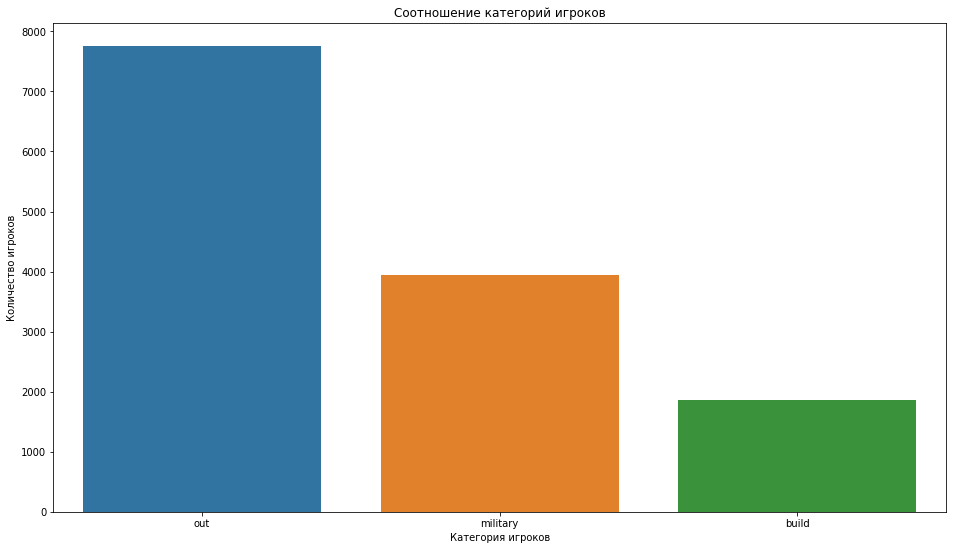

In [31]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="gamer_category", y="user_id", data=players)
plt.title('Соотношение категорий игроков')
ax.set_xlabel('Категория игроков')
ax.set_ylabel('Количество игроков')
plt.show()

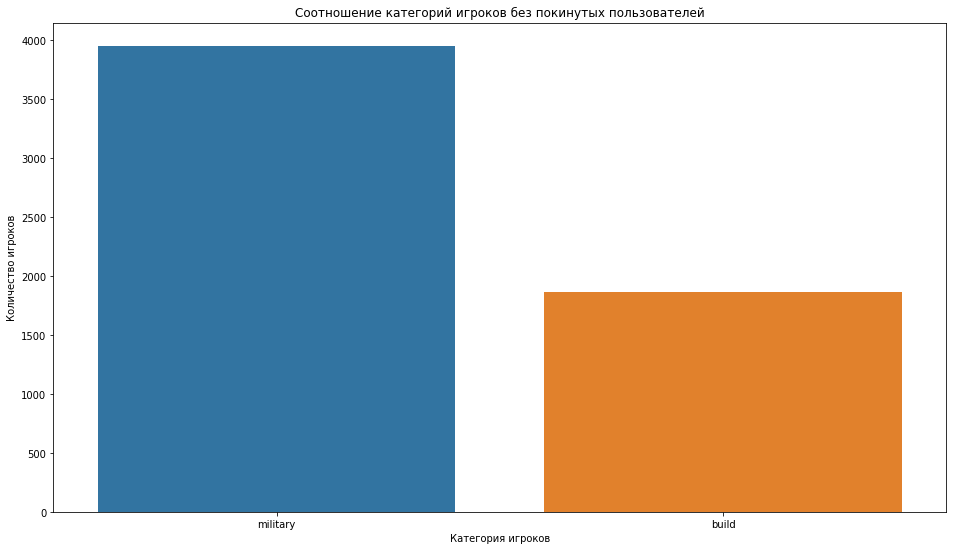

In [32]:
only_players = players[players['gamer_category']!='out']
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="gamer_category", y="user_id", data=only_players)
plt.title('Соотношение категорий игроков без покинутых пользователей')
ax.set_xlabel('Категория игроков')
ax.set_ylabel('Количество игроков')
plt.show()

#### Итог по пункту:
1. Преобладает военный тип категории игроков: 3951 / 1866
    * Военный тип = 29% (от всех игроков)
    * Строительный тип = 14% (от всех игроков)
2. Покинутых игроков больше = 57% от всех игроков.


<a name="s_3"></a>
### Средняя активность пользователей
[К оглавлению](#table_of_contents)

In [33]:
print('Среднее количество событий на пользователя {}'.format(data.groupby('user_id')['event'].count().mean()))
print('Среднее количество событий на пользователя прошедшего первый уровень {}'.format(data[data['user_id'].isin(data[data['event']=='finished_stage_1']['user_id'])].groupby('user_id')['event'].count().mean()))
print('Среднее количество событий на пользователя прошедшего первый уровень через постройку орбитального комплекса {}'.format(data[data['user_id'].isin(builders)].groupby('user_id')['event'].count().mean()))
print('Среднее количество событий на пользователя прошедшего первый уровень через военную победу {}'.format(data[data['user_id'].isin(military)].groupby('user_id')['event'].count().mean()))

Среднее количество событий на пользователя 9.991087212728344
Среднее количество событий на пользователя прошедшего первый уровень 11.770500257864878
Среднее количество событий на пользователя прошедшего первый уровень через постройку орбитального комплекса 14.64790996784566
Среднее количество событий на пользователя прошедшего первый уровень через военную победу 10.411541381928625


In [34]:
data['date'] = data['event_datetime'].dt.date
DAU = data.groupby('date').agg({'user_id': 'nunique'}).mean()
print('Среднее количество активных пользователей {}'.format(DAU.mean()))
print('Среднее количество действий в день {}'.format(data.groupby('date')['event'].count().mean()))

Среднее количество активных пользователей 2884.878787878788
Среднее количество действий в день 4110.272727272727


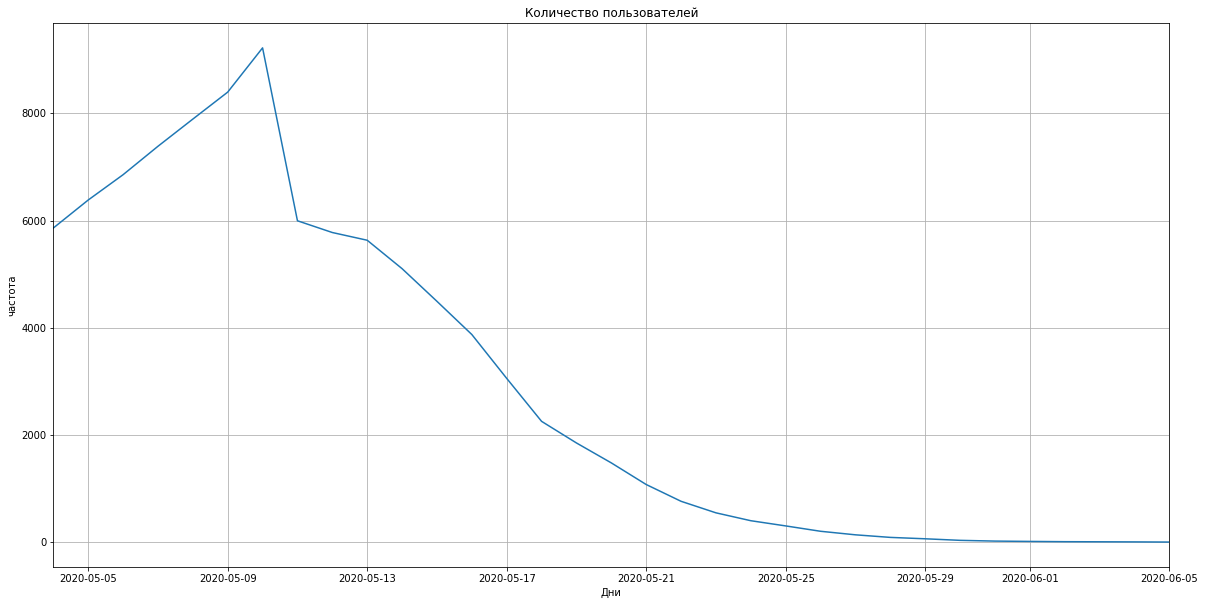

In [35]:
dau_graph = data.groupby('date').agg({'user_id': 'nunique'})
dau_graph.plot(grid=True, title='Количество пользователей', figsize=(20, 10),legend=False)
plt.xlabel('Дни')
plt.ylabel('частота')
plt.show()

#### Итог по пункту:
1. Среднее количество активных пользователей в день равно 2884
    * Из них активных действий 4110
2. Пик активности пользователей приходится на 10-11 мая, далее идет резкий спад.
    * К концу месяца не остается изначальных активных пользователей.

<a name="s_4"></a>
### Рекламные источники и привлеченные пользователи
[К оглавлению](#table_of_contents)

In [36]:
add_by_user = data.groupby(['source'])['user_id'].nunique().reset_index()
add_by_user

,source,user_id
0,facebook_ads,2726
1,instagram_new_adverts,3347
2,yandex_direct,4817
3,youtube_channel_reklama,2686


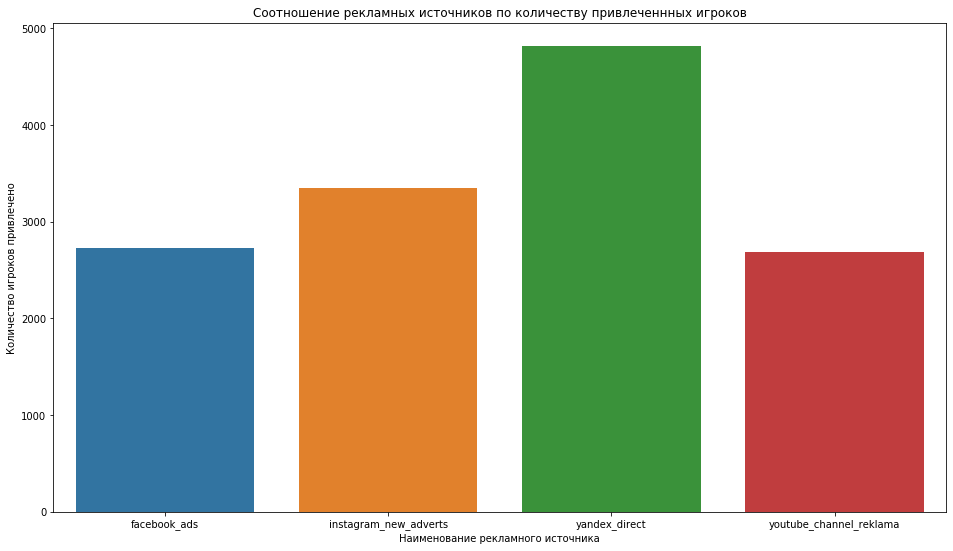

In [37]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source", y="user_id", data=add_by_user)
plt.title('Соотношение рекламных источников по количеству привлеченнных игроков')
ax.set_xlabel('Наименование рекламного источника')
ax.set_ylabel('Количество игроков привлечено')
plt.show()

##### Итог по графику:
1. С Yandex_direct пришло больше всех игроков
2. Замыкают Youtube и Facebook с разницей ~ 40 человек

In [38]:
add_costs = (ad_costs.groupby('source')['cost'].sum().reset_index())
add_costs = add_costs.merge(add_by_user, on= 'source')
add_costs['mean'] = (add_costs['cost'] / add_costs['user_id'])
add_costs

,source,cost,user_id,mean
0,facebook_ads,2140.904643,2726,0.785365
1,instagram_new_adverts,2161.441691,3347,0.645785
2,yandex_direct,2233.111449,4817,0.463590
3,youtube_channel_reklama,1068.119204,2686,0.397662


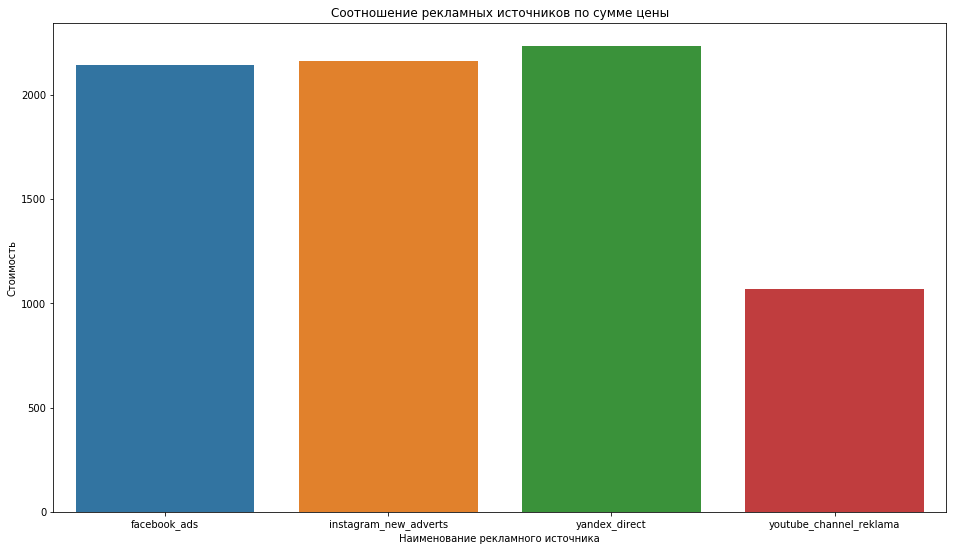

In [39]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source", y="cost", data=add_costs)
plt.title('Соотношение рекламных источников по сумме цены')
ax.set_xlabel('Наименование рекламного источника')
ax.set_ylabel('Стоимость')
plt.show()

##### Итог по графику:
1. Yandex, Instagram, Facebook - тройка дорогих рекламных источников
    * Разница между ними в десятках.
2. При этом Facebook привел меньше игроков, в соотношении с затратами на рекламу это достаточно растратно.

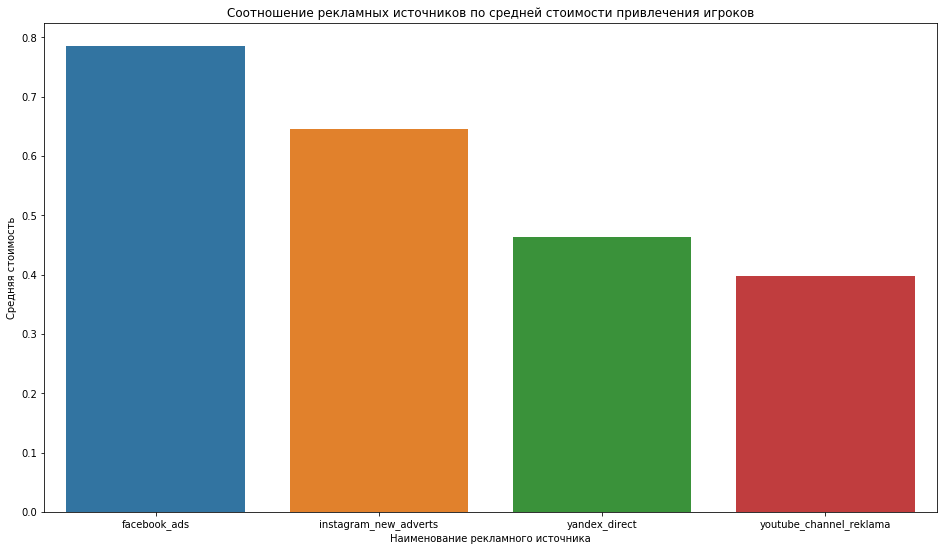

In [40]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source", y="mean", data=add_costs)
plt.title('Соотношение рекламных источников по средней стоимости привлечения игроков')
ax.set_xlabel('Наименование рекламного источника')
ax.set_ylabel('Средняя стоимость')
plt.show()

##### Итог по графику
1. Средняя стоимость привлечения у Facebook самая большая, но приводит не настолько много игроков, чтобы окупить затраты. 

### Вывод по шагу 2

1. Преобладает военный тип категории игроков: 3951 / 1866
2. Покинутых игроков много и их уход начинается в самом начале после резкого взлета активности, к концу месяца никого не остается.
3. Среднее количество активных пользователей в день равно 2884
    * Из них активных действий 4110
        * примерно 9 действий на пользователя.
4. По рекламным источникам: С Yandex_direct пришло больше всех игроков
5. Facebook дорогой на привлечения, но приводит мало игроков.

<a name="stage_3"></a>
## Шаг 3. Анализ бизнес-показателей
[К оглавлению](#table_of_contents)

<a name="s_5"></a>
### Когорты
[К оглавлению](#table_of_contents)

В общий датасет добавлю столбец с общим временем для создания когорт в будущем.

In [41]:
data['day'] = data['event_datetime'].astype('datetime64[D]')
first_action = data.groupby('user_id')['day'].min()
first_action.name = 'first_action'
data = data.merge(first_action, on= 'user_id')
data

,event_datetime,event,building_type,user_id,project_type,gamer_category,source,date,day,first_action
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,out,youtube_channel_reklama,2020-05-04,2020-05-04,2020-05-04
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,out,youtube_channel_reklama,2020-05-05,2020-05-05,2020-05-04
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,out,youtube_channel_reklama,2020-05-05,2020-05-05,2020-05-04
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,out,youtube_channel_reklama,2020-05-05,2020-05-05,2020-05-04
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,out,youtube_channel_reklama,2020-05-06,2020-05-06,2020-05-04
...,...,...,...,...,...,...,...,...,...,...
135634,2020-05-13 23:56:39,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,out,facebook_ads,2020-05-13,2020-05-13,2020-05-10
135635,2020-05-18 00:23:28,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,out,facebook_ads,2020-05-18,2020-05-18,2020-05-10
135636,2020-05-10 23:59:52,building,assembly_shop,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,out,youtube_channel_reklama,2020-05-10,2020-05-10,2020-05-10
135637,2020-05-13 08:11:19,building,spaceport,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,out,youtube_channel_reklama,2020-05-13,2020-05-13,2020-05-10


In [42]:
#добавлю временные показатели
data['first_visit_day'] = data['first_action'].astype('datetime64[D]')
data['visit_day'] = data['date'].astype('datetime64[D]')
data['lifetime'] = (data['visit_day'] - data['first_visit_day']) / np.timedelta64(1, 'D')
data['lifetime'] = data['lifetime'].round().astype('int')
#сформирую когорты
cohort_visits = data.groupby(['first_visit_day', 'lifetime']).agg({'user_id': 'nunique'}).reset_index()
f_uid = cohort_visits[cohort_visits['lifetime'] == 0][['first_visit_day', 'user_id']]
f_uid.columns = ['first_visit_day', 'f_uid']
#создам новый датафрейм по когортам
cohort_visits = cohort_visits.merge(f_uid)
cohort_visits['retention'] = cohort_visits['user_id'] / cohort_visits['f_uid']
visits_retention_pivot = cohort_visits.pivot_table(index = 'first_visit_day', columns = 'lifetime', values = 'retention', aggfunc = 'sum')

visits_retention_pivot.mean() * 100

lifetime
0     100.000000
1      47.087414
2      48.303974
3      48.832991
4      49.207248
5      48.317188
6      48.328101
7      40.986593
8      32.558052
9      30.703390
10     27.541749
11     24.210674
12     19.895769
13     14.648858
14     11.275992
15      8.525538
16      6.193929
17      4.997210
18      3.530571
19      2.560446
20      1.658215
21      1.118861
22      0.626305
23      0.495224
24      0.241952
25      0.274706
26      0.183057
27      0.152039
28      0.097135
29      0.113907
30      0.044136
31      0.034130
dtype: float64

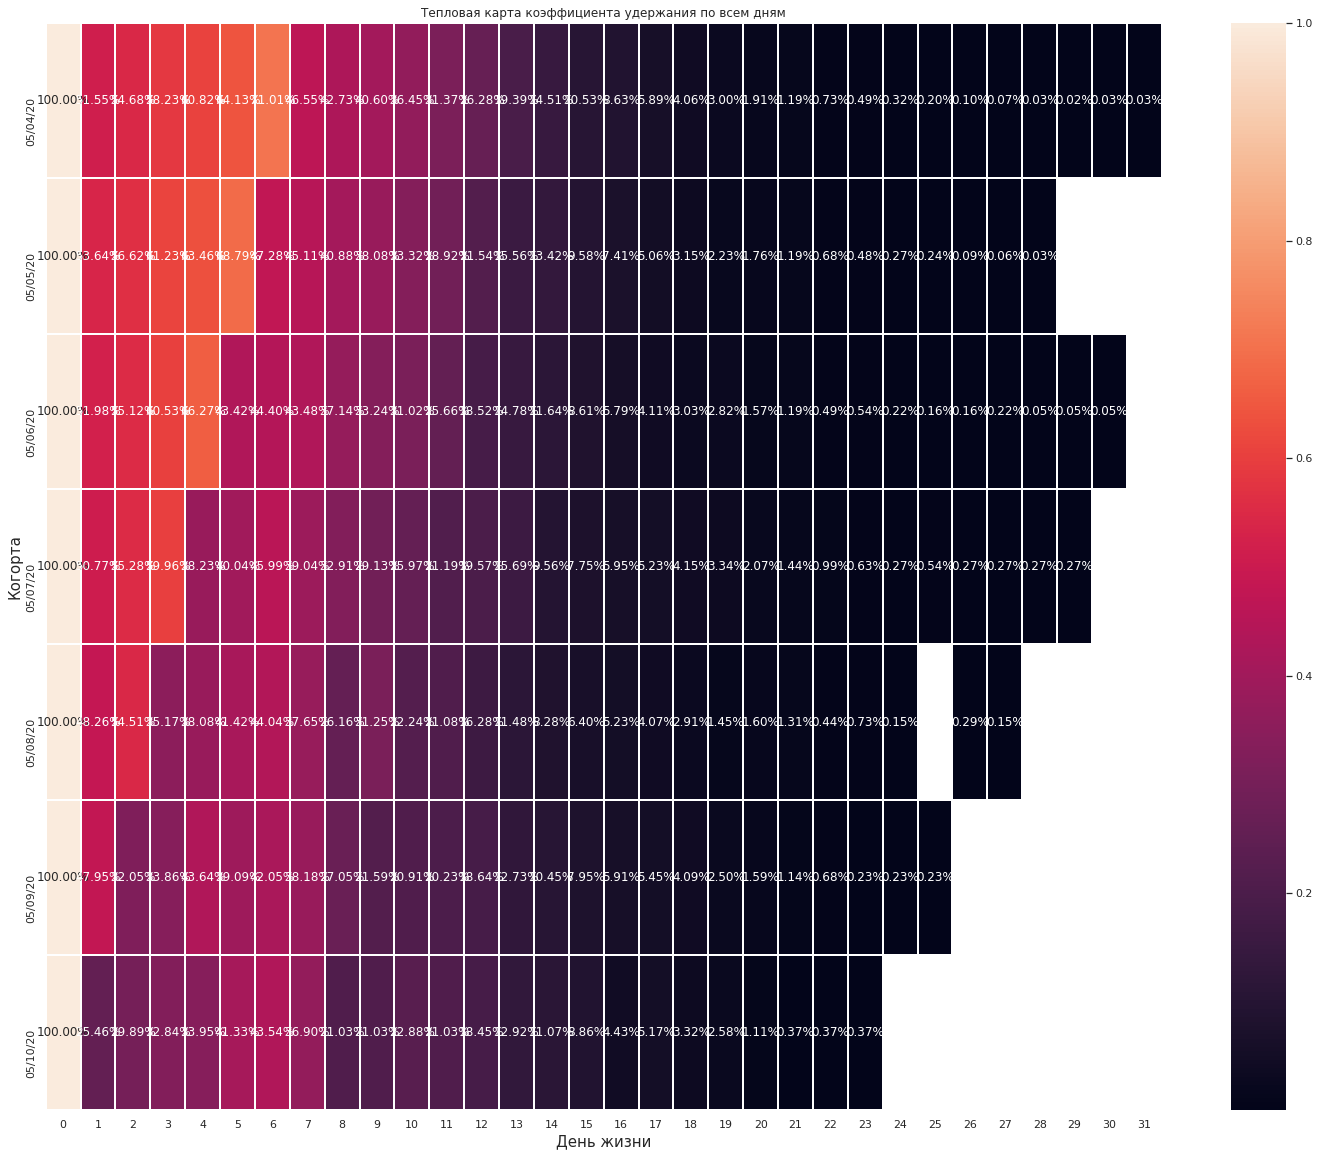

In [43]:
visits_retention_pivot.index = visits_retention_pivot.index.strftime("%D")
sns.set(style = 'white')
plt.figure(figsize = (25, 20))
plt.title('Тепловая карта коэффициента удержания по всем дням')
sns.heatmap(visits_retention_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='white')
plt.ylabel('Когорта', fontsize=15)
plt.xlabel('День жизни',fontsize=15)
plt.show()

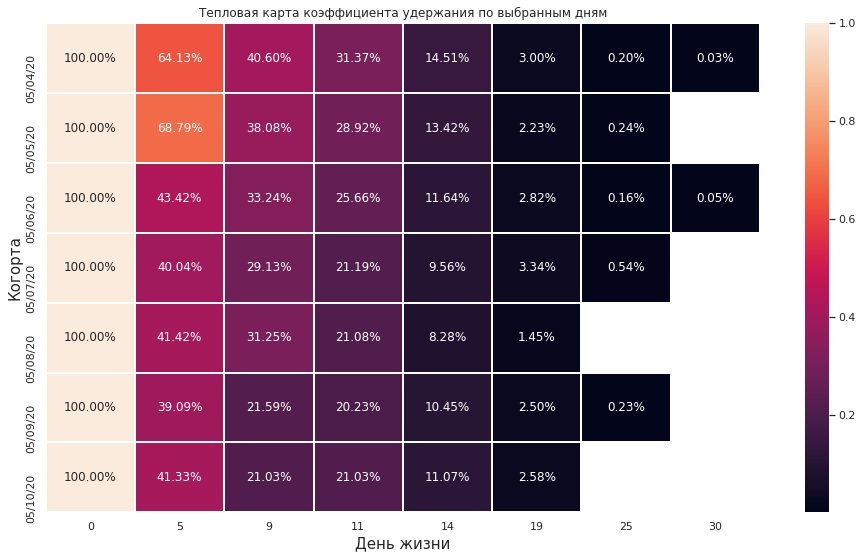

In [44]:
sns.set(style = 'white')
plt.figure(figsize = (16, 9))
plt.title('Тепловая карта коэффициента удержания по выбранным дням')
sns.heatmap(visits_retention_pivot[[0,5,9,11,14,19,25,30]], annot=True, fmt='.2%', linewidths=1, linecolor='white')
plt.ylabel('Когорта', fontsize=15)
plt.xlabel('День жизни',fontsize=15)
plt.show()




In [45]:
print(("Средний Retention Rate в начале месяца когорты равен: {0:.1%}".format (visits_retention_pivot[1].mean())))
print(("Средний Retention Rate на половине месяца когорты равен: {0:.1%}".format (visits_retention_pivot[15].mean())))
print(("Средний Retention Rate на конец месяца когорты равен: {0:.1%}".format (visits_retention_pivot[31].mean())))

Средний Retention Rate в начале месяца когорты равен: 47.1%
Средний Retention Rate на половине месяца когорты равен: 8.5%
Средний Retention Rate на конец месяца когорты равен: 0.0%


#### Итог по пункту:
1. Уже на вторые сутки коэфициент удержания падает до 50-40%.
2. К концу месяца никого не остается на первом уровне.

<a name="s_6"></a>
### CAC
[К оглавлению](#table_of_contents)

In [46]:
n_players = data.groupby(['first_action', 'source']).agg({'user_id': 'nunique'}).reset_index()
#Здесь мне пришлось переименовать столбец в изначальном датасете, т.к. стали появляться дполнительные столбцы
ad_costs = ad_costs.rename({'day': 'first_action'}, axis='columns')
n_players = n_players.merge(ad_costs, on=['first_action','source'])
n_players['cac'] = n_players['cost'] / n_players['user_id']
n_players

,first_action,source,user_id,cost,cac
0,2020-05-04,facebook_ads,1184,548.354480,0.463137
1,2020-05-04,instagram_new_adverts,1452,502.925451,0.346367
2,2020-05-04,yandex_direct,2078,554.651494,0.266916
3,2020-05-04,youtube_channel_reklama,1146,259.073224,0.226067
4,2020-05-05,facebook_ads,694,260.185754,0.374907
5,2020-05-05,instagram_new_adverts,796,313.970984,0.394436
6,2020-05-05,yandex_direct,1208,308.232990,0.255160
7,2020-05-05,youtube_channel_reklama,663,147.041741,0.221782
8,2020-05-06,facebook_ads,345,177.982200,0.515890
9,2020-05-06,instagram_new_adverts,472,173.071145,0.366676


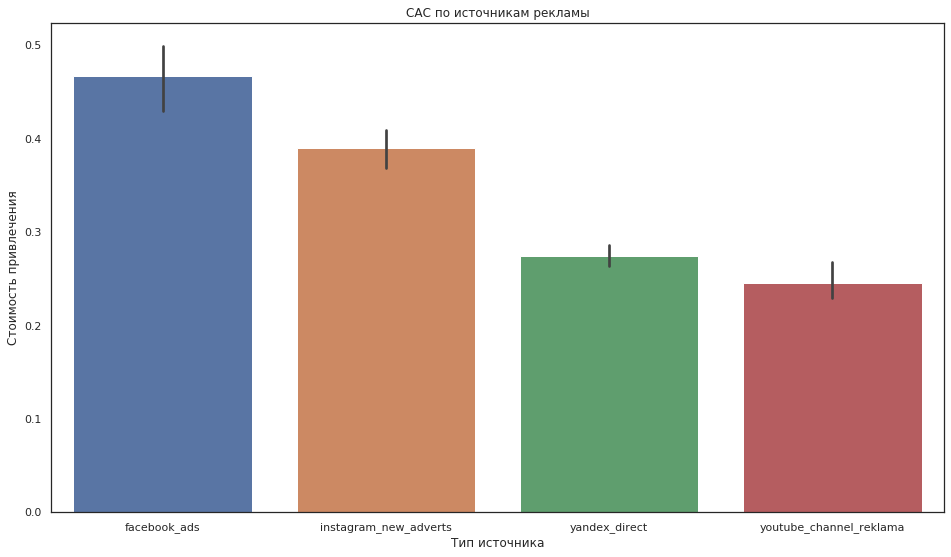

In [47]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source", y="cac", data=n_players)
plt.title('CAC по источникам рекламы')
ax.set_xlabel('Тип источника')
ax.set_ylabel('Стоимость привлечения')
plt.show()

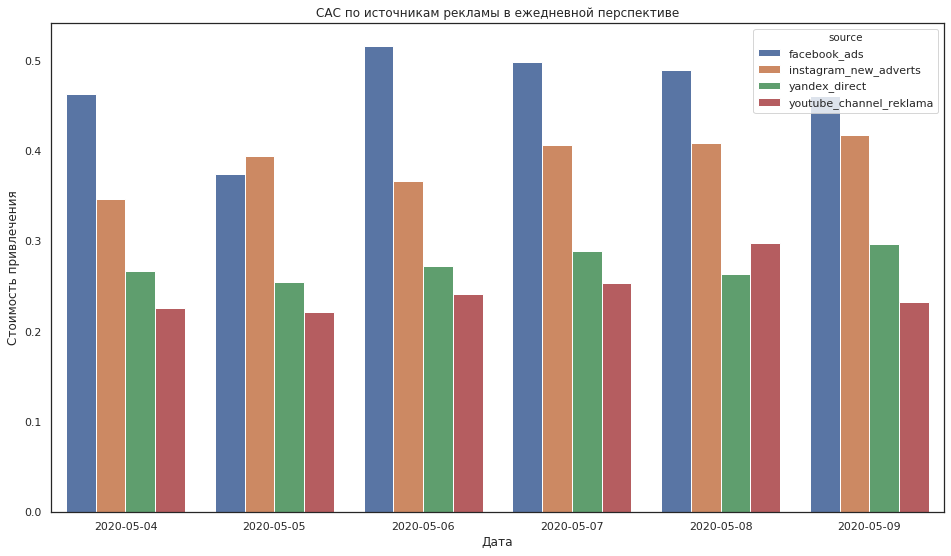

In [48]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x=n_players['first_action'].dt.strftime('%Y-%m-%d'),y='cac',hue='source', data=n_players)
plt.title('CAC по источникам рекламы в ежедневной перспективе')
ax.set_xlabel('Дата')
ax.set_ylabel('Стоимость привлечения')
plt.show()

#### Итог по пункту:
1. Как и было написано выше реклама на Facebook невыгодна
2. Выгодными источниками можно считать Yandex и Youtube

###### Мой комментарий
Было бы лучше если бы были показатели revenue для вычисления ltv и roi - это помогло бы более детально проанализировать финансовую состовляющую источников.

<a name="s_9"></a>
### Дополнительные графики по рекламным источникам.
[К оглавлению](#table_of_contents)

In [49]:
data_category = data[data['event'] == 'finished_stage_1']
data_category.head(10)

,event_datetime,event,building_type,user_id,project_type,gamer_category,source,date,day,first_action,first_visit_day,visit_day,lifetime
19,2020-05-15 05:29:13,finished_stage_1,NaN,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,build,facebook_ads,2020-05-15,2020-05-15,2020-05-04,2020-05-04,2020-05-15,11
32,2020-05-16 11:51:58,finished_stage_1,NaN,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,military,instagram_new_adverts,2020-05-16,2020-05-16,2020-05-04,2020-05-04,2020-05-16,12
49,2020-05-11 14:18:05,finished_stage_1,NaN,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,military,yandex_direct,2020-05-11,2020-05-11,2020-05-04,2020-05-04,2020-05-11,7
73,2020-05-16 13:08:11,finished_stage_1,NaN,4fe0f101-694b-4e31-9740-d1d87f7208ea,NaN,military,facebook_ads,2020-05-16,2020-05-16,2020-05-04,2020-05-04,2020-05-16,12
98,2020-05-18 03:50:27,finished_stage_1,NaN,65a92713-5969-48b1-8945-bfefa5063887,NaN,build,yandex_direct,2020-05-18,2020-05-18,2020-05-04,2020-05-04,2020-05-18,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135510,2020-05-20 17:37:38,finished_stage_1,NaN,01b9c298-e4a6-4069-a59f-5fff97819090,NaN,military,yandex_direct,2020-05-20,2020-05-20,2020-05-10,2020-05-10,2020-05-20,10
135534,2020-05-27 07:48:56,finished_stage_1,NaN,825e727b-7847-4c5f-a26c-3ee0f18d8177,NaN,build,youtube_channel_reklama,2020-05-27,2020-05-27,2020-05-10,2020-05-10,2020-05-27,17
135587,2020-06-02 00:26:56,finished_stage_1,NaN,637a8d39-3872-4549-80cc-bebee6c88056,NaN,build,yandex_direct,2020-06-02,2020-06-02,2020-05-10,2020-05-10,2020-06-02,23
135609,2020-05-26 15:15:19,finished_stage_1,NaN,0d37a895-ee0f-4e36-aadb-880cef670f0b,NaN,military,yandex_direct,2020-05-26,2020-05-26,2020-05-10,2020-05-10,2020-05-26,16


In [50]:
print('Процент игроков, которые прошли первый уровень {} %'.format(np.round((first_level / total_players)*100)))

Процент игроков, которые прошли первый уровень 43.0 %


In [51]:
source_finishing = data_category.groupby(['source','event'])['user_id'].nunique().reset_index().sort_values(by=['user_id'], ascending=False)
source_finishing

,source,event,user_id
2,yandex_direct,finished_stage_1,2042
1,instagram_new_adverts,finished_stage_1,1466
3,youtube_channel_reklama,finished_stage_1,1159
0,facebook_ads,finished_stage_1,1150


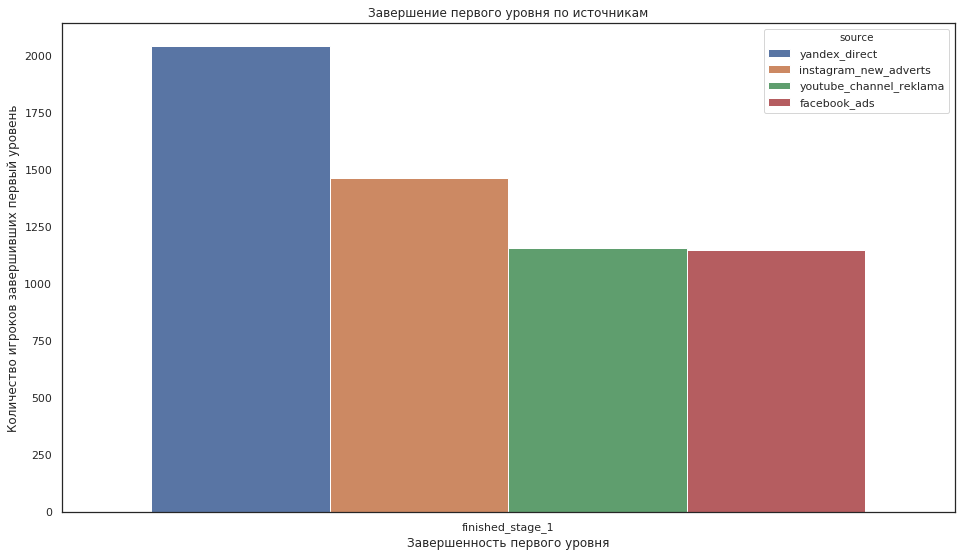

In [52]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="event", y="user_id",hue='source', data=source_finishing)
plt.title('Завершение первого уровня по источникам')
ax.set_xlabel('Завершенность первого уровня')
ax.set_ylabel('Количество игроков завершивших первый уровень')
plt.show()

Лидер среди источников по игрокам завершивших первый уровень Yandex. Замыкают Youtube и Facebook с разничце в 9 игроков.

In [53]:
category_by_source_pl = data_category.groupby(['source','gamer_category'])['user_id'].nunique().reset_index().sort_values(by=['user_id'], ascending=False)
category_by_source_pl

,source,gamer_category,user_id
5,yandex_direct,military,1422
3,instagram_new_adverts,military,990
7,youtube_channel_reklama,military,780
1,facebook_ads,military,759
4,yandex_direct,build,620
2,instagram_new_adverts,build,476
0,facebook_ads,build,391
6,youtube_channel_reklama,build,379


In [54]:
category_by_source_all = data.groupby(['source','gamer_category'])['user_id'].nunique().reset_index().sort_values(by=['user_id'], ascending=False)
category_by_source_all

,source,gamer_category,user_id
8,yandex_direct,out,2775
5,instagram_new_adverts,out,1881
2,facebook_ads,out,1576
11,youtube_channel_reklama,out,1527
7,yandex_direct,military,1422
4,instagram_new_adverts,military,990
10,youtube_channel_reklama,military,780
1,facebook_ads,military,759
6,yandex_direct,build,620
3,instagram_new_adverts,build,476


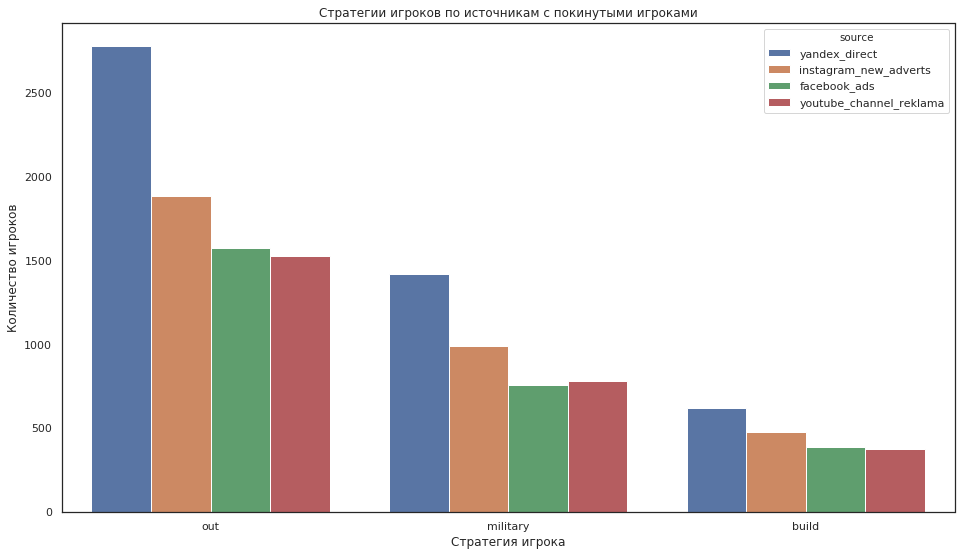

In [55]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="gamer_category", y="user_id",hue='source', data=category_by_source_all)
plt.title('Стратегии игроков по источникам с покинутыми игроками')
ax.set_xlabel('Стратегия игрока')
ax.set_ylabel('Количество игроков')
plt.show()

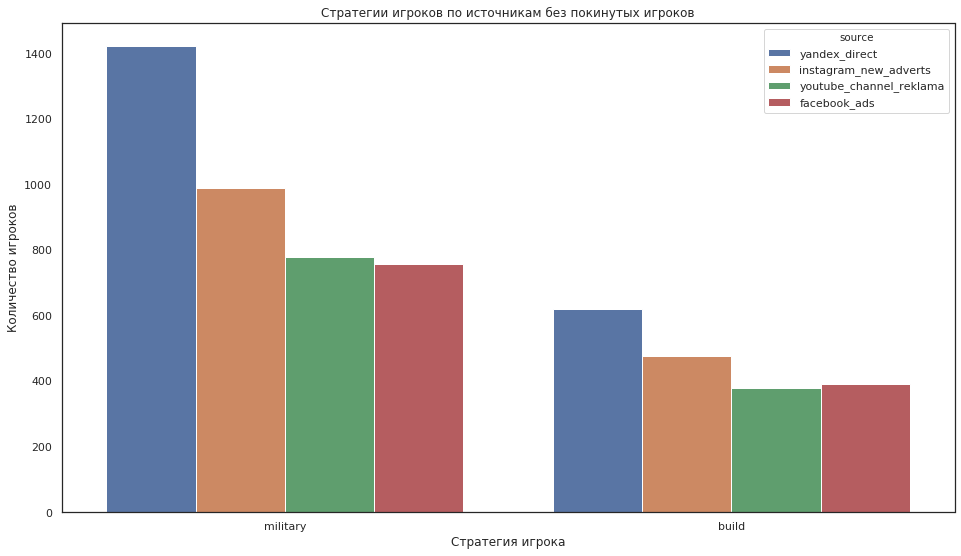

In [56]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="gamer_category", y="user_id",hue='source', data=category_by_source_pl)
plt.title('Стратегии игроков по источникам без покинутых игроков')
ax.set_xlabel('Стратегия игрока')
ax.set_ylabel('Количество игроков')
plt.show()

1. С Yandex приходит много игроков и достаточно много потом покидают.  
2. Больше опять-таки выбор в сторону военной стратегии, вне зависимости от источника. Нет явного предпочтения у пользователей с разных платформ в выборе военной или строительной стратегии.

In [57]:
building_by_source = data.groupby(['source','building_type'])['user_id'].nunique().reset_index().sort_values(by=['user_id'], ascending=False)
building_by_source

,source,building_type,user_id
6,yandex_direct,assembly_shop,4817
8,yandex_direct,spaceport,4700
3,instagram_new_adverts,assembly_shop,3347
5,instagram_new_adverts,spaceport,3268
0,facebook_ads,assembly_shop,2726
7,yandex_direct,research_center,2710
9,youtube_channel_reklama,assembly_shop,2686
2,facebook_ads,spaceport,2664
11,youtube_channel_reklama,spaceport,2599
4,instagram_new_adverts,research_center,1906


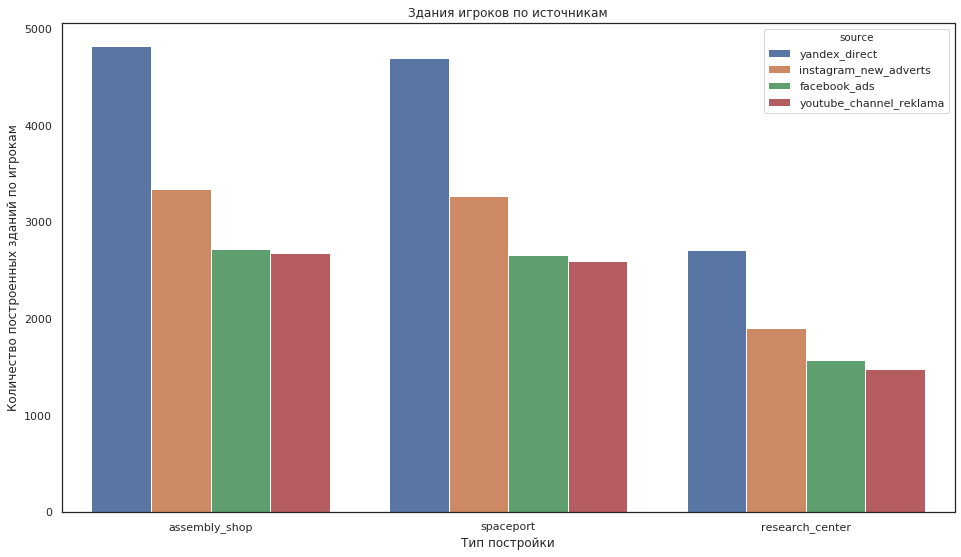

In [58]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="building_type", y="user_id",hue='source', data=building_by_source)
plt.title('Здания игроков по источникам')
ax.set_xlabel('Тип постройки')
ax.set_ylabel('Количество построенных зданий по игрокам')
plt.show()

1. Все начинается со сборочного цеха - это старт для всех.
2. Космопорт важный этап к военной победе.
3. Но до исследовательского центра доходит меньше людей.
4. По источникам опять Yandex в лидерах и следом Instagram. 
5. Youtube и Facebook идут близко друг к другу.

In [59]:
project_by_source = data.groupby(['source','project_type'])['user_id'].nunique().reset_index().sort_values(by=['user_id'], ascending=False)
project_by_source

,source,project_type,user_id
2,yandex_direct,satellite_orbital_assembly,620
1,instagram_new_adverts,satellite_orbital_assembly,476
0,facebook_ads,satellite_orbital_assembly,391
3,youtube_channel_reklama,satellite_orbital_assembly,379


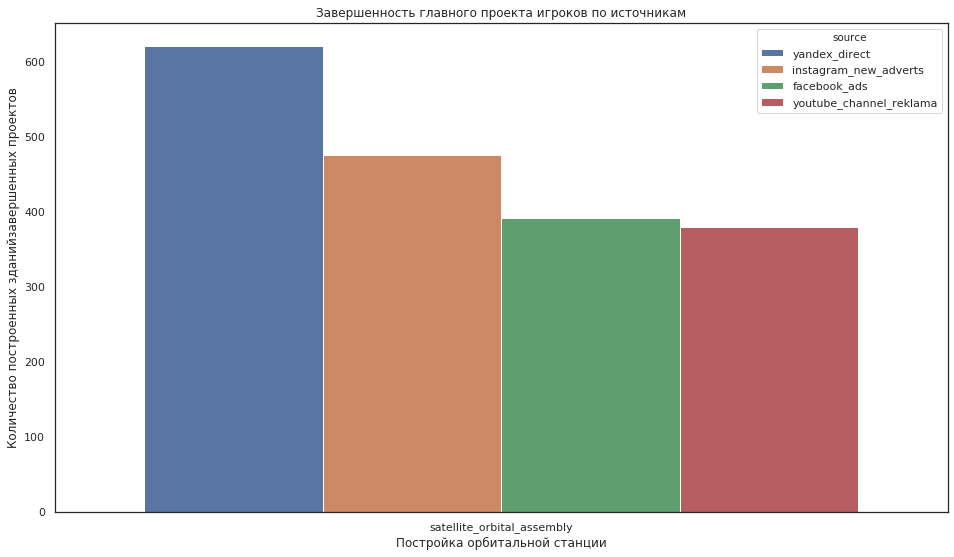

In [60]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="project_type", y="user_id",hue='source', data=project_by_source)
plt.title('Завершенность главного проекта игроков по источникам')
ax.set_xlabel('Постройка орбитальной станции')
ax.set_ylabel('Количество построенных зданийзавершенных проектов')
plt.show()

Через строительную победу чаще доходят пользователи пришедшие с Yandex. Разница в 12 человек у Facebook и Youtube.

<a name="stage_4"></a>
## Шаг 4. Проверка стат. гипотез
[К оглавлению](#table_of_contents)

<a name="s_7"></a>
#### Гипотеза 1.  Время завершения уровня различается в зависимости способа прохождения
[К оглавлению](#table_of_contents)

Н0 - время прохождения первого уровня одинаково для любого из условий прохождений первого уровня

Н1 - время прохождения первого уровня для каждого из способов различается

стат. значимость = 0.05

In [61]:
category_builder = data_category[data_category['gamer_category'] == 'build']['lifetime']
category_military = data_category[data_category['gamer_category'] == 'military']['lifetime']
# Дисперсия:
print(np.var(category_builder, ddof=1))
print(np.var(category_military, ddof=1))

12.408867586757813
16.849998558288398


In [62]:
alpha = 0.05

results = st.ttest_ind(category_builder, category_military, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 6.570466755643636e-105
Отвергаем нулевую гипотезу


повышу стат. значимость до 0.01

In [63]:
alpha = 0.01

results = st.ttest_ind(category_builder, category_military, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 6.570466755643636e-105
Отвергаем нулевую гипотезу


In [64]:
print('Среднее время прохождения (в днях) для "строителей"  - {:.2f}'.format(category_builder.mean()))
print('Среднее время прохождения (в днях) для "воителей" - {:.2f}'.format(category_military.mean()))

Среднее время прохождения (в днях) для "строителей"  - 13.40
Среднее время прохождения (в днях) для "воителей" - 11.06


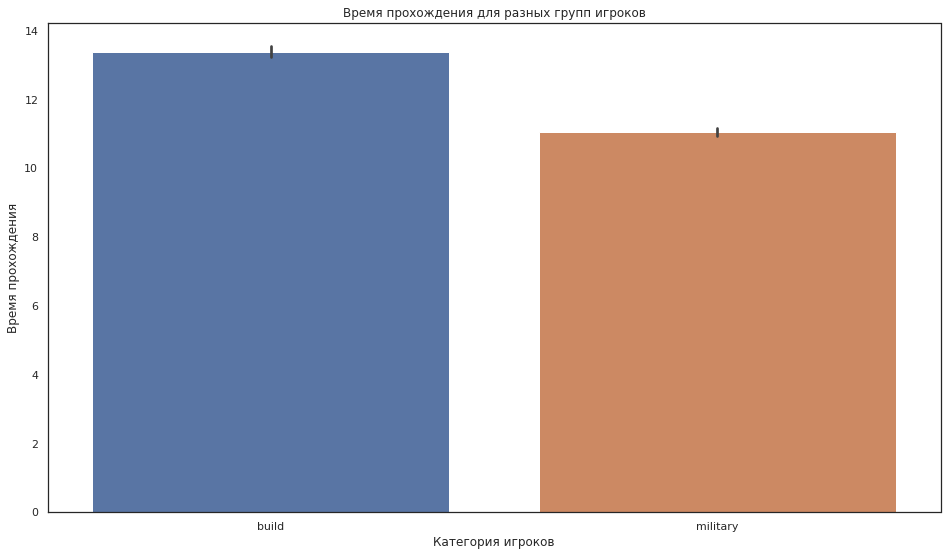

In [65]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x=data_category['gamer_category'],y='lifetime', data=data_category)
plt.title('Время прохождения для разных групп игроков')
ax.set_xlabel('Категория игроков')
ax.set_ylabel('Время прохождения')
plt.show()

#### Выод по пункту:
Время прохождения, действительно, зависит от выбора стратегии игры.
Игроки выбравшие военный метод быстрее проходят уровень.

<a name="s_8"></a>
#### Гипотеза 2: Рекламный источник влияет на выбор стратегии в игре:


[К оглавлению](#table_of_contents)

Н0 - вывод о различии сделать нельзя.

Н1 - разница статистически значима.

стат. значимость = 0.05

In [66]:
test_table = data_category.pivot_table(index='source', columns='gamer_category',values='user_id',aggfunc='nunique').sort_values('build',ascending=False)
test_table

gamer_category,build,military
source,,
yandex_direct,620,1422
instagram_new_adverts,476,990
facebook_ads,391,759
youtube_channel_reklama,379,780


In [67]:
category=data_category.groupby('gamer_category').agg({'user_id': 'nunique'})
category

,user_id
gamer_category,
build,1866
military,3951


In [68]:
#Н0 - вывод о различии сделать нельзя
#Н1 - разница статистически значима
#статистическая значимость = 0.05

#Для этого нужно использовать Z-критерий
def z_test(data1, data2, event):
    alpha=0.05
    event1 = test_table.loc[event, data1]
    event2 = test_table.loc[event, data2] 
    category1 = category.loc[data1, 'user_id'] 
    category2 = category.loc[data2, 'user_id'] 
    p1 = event1 / category1 
    p2 = event2 / category2 
    difference = p1 - p2
    p_combined = (event1 + event2) / (category1 + category2) 
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1 / category1 + 1 / category2))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)
 
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        )
for event in test_table.index:
    z_test('build','military', event)
    print()         

p-значение:  0.03919076218160611
Отвергаем нулевую гипотезу: между долями есть значимая разница

p-значение:  0.7108167516045596
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение:  0.11909138013353449
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение:  0.6120627488448365
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Повышу строгость статистической значимости.

In [69]:
#Н0 - вывод о различии сделать нельзя
#Н1 - разница статистически значима
#статистическая значимость = 0.01

#Для этого нужно использовать Z-критерий
def z_test(data1, data2, event):
    alpha=0.01
    event1 = test_table.loc[event, data1]
    event2 = test_table.loc[event, data2] 
    category1 = category.loc[data1, 'user_id'] 
    category2 = category.loc[data2, 'user_id'] 
    p1 = event1 / category1 
    p2 = event2 / category2 
    difference = p1 - p2
    p_combined = (event1 + event2) / (category1 + category2) 
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1 / category1 + 1 / category2))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)
 
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        )
for event in test_table.index:
    z_test('build','military', event)
    print() 

p-значение:  0.03919076218160611
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение:  0.7108167516045596
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение:  0.11909138013353449
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение:  0.6120627488448365
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



In [70]:
source = data_category.pivot_table(index='source', columns='gamer_category',values='user_id',aggfunc='nunique').sort_values('build',ascending=False)
source['source'] = source.index
source

gamer_category,build,military,source
source,,,
yandex_direct,620,1422,yandex_direct
instagram_new_adverts,476,990,instagram_new_adverts
facebook_ads,391,759,facebook_ads
youtube_channel_reklama,379,780,youtube_channel_reklama


In [71]:
print('Разница между строителями и воителями в рекламном источнике Yandex: {0:.1f} '.format (source[source['source']=='yandex_direct']['military'].mean() - source[source['source']=='yandex_direct']['build'].mean()))
print('Разница между строителями и воителями в рекламном источнике Instagram: {0:.1f} '.format (source[source['source']=='instagram_new_adverts']['military'].mean() - source[source['source']=='instagram_new_adverts']['build'].mean()))
print('Разница между строителями и воителями в рекламном источнике Facebook: {0:.1f} '.format (source[source['source']=='facebook_ads']['military'].mean() - source[source['source']=='facebook_ads']['build'].mean()))
print('Разница между строителями и воителями в рекламном источнике Youtube: {0:.1f} '.format (source[source['source']=='youtube_channel_reklama']['military'].mean() - source[source['source']=='youtube_channel_reklama']['build'].mean()))

Разница между строителями и воителями в рекламном источнике Yandex: 802.0 
Разница между строителями и воителями в рекламном источнике Instagram: 514.0 
Разница между строителями и воителями в рекламном источнике Facebook: 368.0 
Разница между строителями и воителями в рекламном источнике Youtube: 401.0 


#### Вывод по пункту:
1. Изначально с стандартной стат. значимостью в 5% - источник yandex имел влияние на выбор стратегии игрока.
2. Но повысив строгость стат. значимости в 1% - все источники не имеют влияния на выбор стратегии игрока.

Считаю, что "положительный" результат теста при стат. значимости 5% - это ошибка, поэтому придерживаюсь результатов второго варианта теста.


In [72]:
#введу поправку Бонферони для снижения вероятности ложноположительного результата:
#Н0 - вывод о различии сделать нельзя
#Н1 - разница статистически значима
#статистическая значимость = 0.05/4 

#Для этого нужно использовать Z-критерий
def z_test(data1, data2, event):
    alpha=0.05/4
    event1 = test_table.loc[event, data1]
    event2 = test_table.loc[event, data2] 
    category1 = category.loc[data1, 'user_id'] 
    category2 = category.loc[data2, 'user_id'] 
    p1 = event1 / category1 
    p2 = event2 / category2 
    difference = p1 - p2
    p_combined = (event1 + event2) / (category1 + category2) 
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1 / category1 + 1 / category2))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)
 
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        )
for event in test_table.index:
    z_test('build','military', event)
    print()

p-значение:  0.03919076218160611
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение:  0.7108167516045596
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение:  0.11909138013353449
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение:  0.6120627488448365
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



<a name="stage_5"></a>
## Вывод
[К оглавлению](#table_of_contents)

Мною были изучены датасеты для анализа рекламных источников. Далее описаны главные итоги:

1. Много покинутых игроков.
    * Активность падает практически сразу, как видно на когортном анализе, на 2-5 сутки активность составляет чуть менее 50%, к концу месяца не остается никого, т.е. новых игроков с каждым днем мало, а те что приходят могут и не завершать урвоень.
2. Среди категорий пользователей больше "воителей":
    * Строители (те кто проходят первый уровень через строительство орбитальной станции): 1866 
    * Воители (те кто проходит первый уровень через военную победу): 3951
3. Согласно проверенной гипотезе воители завершают первый уровень быстрее.
    * Среднее время прохождения (в днях) для "строителей"  - 13.40
    * Среднее время прохождения (в днях) для "воителей" - 11.06
4. Активность пользователей:
    * Среднее количество событий на пользователя 10
    * Среднее количество событий на пользователя прошедшего первый уровень 11.7
    * Среднее количество событий на пользователя прошедшего первый уровень через постройку орбитального комплекса 14.6
    * Среднее количество событий на пользователя прошедшего первый уровень через военную победу 10.4


По рекламным источникам:

1. Yandex приводит больше всего игроков и не так затратен.
2. Facebook потребляет больше всего средств, но приводит куда меньше игроков. Согласно САС Facebook находится на первом месте на протяжении всей "активной" недели с 4 по 5 мая.
3. Гипотеза о том, что рекламный источник имеет влияния на выбор стратегии игрока при стат. значимости в макисмальной строгости опровергается.
    * Разница между строителями и воителями в рекламном источнике Yandex: 802.0 
    * Разница между строителями и воителями в рекламном источнике Instagram: 514.0 
    * Разница между строителями и воителями в рекламном источнике Facebook: 368.0 
    * Разница между строителями и воителями в рекламном источнике Youtube: 401.0 


<a name="stage_6"></a>
## Рекомендации 
[К оглавлению](#table_of_contents)

1. Дополнить данные по рекламным revenue для лучшего анализа бизнес-показателей LTV и ROI.
2. Более детально проанализировать причины ухода пользователей:
    * Узнать почему многие бросают игру, возможно нужно сделать больше побочных активностей не делать упор только на главную цель прохождения первого уровня через военный или строительный способы.
        * Сделать сезонные активности и побочные задания.
        * Сформировать несколько уровневые условия прохождения первого уровня (например, основаня цель даст одну звезду к прохождению, и сделать еще несколько условий, которые будут давать еще звезды-дополнительные баллы для следующих уровней).
        * Это будет побуждать к азарту у пользователей.
3. Можно сделать разуню рекламу для разных типов источников и там уже закладывать стратегии игры.
    * Для этого нужны исследования целевых групп каждой соц. сети по возрасту - возможно на выбор стратегии влияет возраст или мировоззрение, а зная как соц. сети различаются между собой, можно предположить, что рекламный источник может иметь влияние на выбор стратегии, если показ рекламы будет подходящим.

In [73]:
#data.to_csv('~/Desktop/data.csv', index=False)